# GENOMIC DATASET

### Implementing Anomaly Detection with Autoencoder
### Implementing Multi Layer Perceptron

In [1]:
### Importing Libraries and dataset

import pandas as pd
import seaborn as sns
import numpy as np
import gzip
import tensorflow as tf
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,precision_score,accuracy_score, recall_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
## importing the genomicMAtrix dataset

gene = pd.read_csv('miller2005_public_miller2005_genomicMatrix.gz', compression='gzip',delimiter="\t", header=0 )
gene.head()

,probe,X100B08,X101B88,X102B06,X103B41,X104B91,X105B13,X106B55,X10B88,X110B34,...,X85A03,X86A40,X87A79,X88A67,X8B87,X90A63,X94A16,X96A21,X99A50,X9B52
0,211050_x_at,-0.606098,-0.712117,-0.249024,0.473394,-0.549072,-0.309201,0.418973,-0.394657,-0.472516,...,0.194257,-0.014784,0.134075,-0.199902,0.118920,-0.379270,0.820076,-0.045577,-0.024553,0.270666
1,220399_at,0.297762,0.108554,0.529916,-0.023698,-0.240675,-0.186095,0.002805,-0.131806,0.113295,...,0.158997,0.228585,-1.618250,-0.237390,0.228423,-0.433717,-1.760925,0.290775,0.248707,-0.022792
2,202115_s_at,-0.020720,-0.329813,-0.455560,0.335867,0.091474,-0.064934,0.232192,-0.024533,0.390957,...,0.611860,0.303448,0.073593,-0.082835,0.133630,0.055395,0.071154,-0.114437,0.242833,0.218242
3,224501_at,0.019116,-0.508560,0.056202,-0.011279,0.189046,0.696562,0.192982,-0.319991,-0.243859,...,0.209864,0.215092,-0.323448,-0.020308,0.214315,0.212823,0.368002,0.207986,0.267993,0.791909
4,227347_x_at,0.217003,0.750269,0.469504,-0.182406,-0.472260,0.294003,0.147632,0.462857,0.781625,...,-0.792750,0.744523,0.156747,-0.060445,0.107039,-0.192824,0.030753,-0.463569,0.116094,-0.142529


In [3]:
## transpose the dataset to have the features as columns

new_gene = gene.set_index('probe').T.rename_axis('sampleID').reset_index()
new_gene

probe,sampleID,211050_x_at,220399_at,202115_s_at,224501_at,227347_x_at,205483_s_at,212283_at,212285_s_at,217419_x_at,...,216922_x_at,208331_at,211461_at,232402_at,207647_at,207646_s_at,207916_at,202829_s_at,214950_at,208164_s_at
0,X100B08,-0.606098,0.297762,-0.020720,0.019116,0.217003,-0.959766,0.319060,0.267431,0.054625,...,0.585269,0.677886,0.294886,0.334739,-0.922423,0.525822,0.655930,-0.373383,0.533709,0.955100
1,X101B88,-0.712117,0.108554,-0.329813,-0.508560,0.750269,-0.739374,-0.635076,0.404148,0.553476,...,0.343490,-0.377170,-0.146836,-0.027103,0.108189,-0.108456,0.800626,0.047387,-0.630866,0.550008
2,X102B06,-0.249024,0.529916,-0.455560,0.056202,0.469504,0.436696,0.253222,0.236894,0.263844,...,-1.192292,-0.264924,-0.403073,-0.273291,0.408303,0.256424,0.052404,-0.076766,0.170939,-0.016254
3,X103B41,0.473394,-0.023698,0.335867,-0.011279,-0.182406,0.913891,0.134585,0.468412,0.508557,...,0.233813,-0.182134,-0.132613,0.314508,0.147834,-0.766659,-1.517961,0.487872,0.394624,0.440938
4,X104B91,-0.549072,-0.240675,0.091474,0.189046,-0.472260,1.184845,0.204097,0.397236,0.107320,...,-0.063716,-0.051118,-0.149773,-0.304061,-1.229899,-0.000545,0.574513,0.597032,0.196972,0.120323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,X90A63,-0.379270,-0.433717,0.055395,0.212823,-0.192824,0.971321,-0.620542,-0.300075,-0.227528,...,-0.206234,-0.513839,-0.401776,-0.095711,-0.100813,-1.245132,-1.202338,0.419989,0.774586,0.810731
247,X94A16,0.820076,-1.760925,0.071154,0.368002,0.030753,1.839521,-0.131311,-0.134719,-0.088519,...,0.158520,-0.533802,0.656851,-0.550142,1.029998,0.569329,-0.975293,-0.121131,0.291052,-0.603854
248,X96A21,-0.045577,0.290775,-0.114437,0.207986,-0.463569,-0.695891,-0.275499,-0.617247,-0.927063,...,-0.176975,0.228833,0.444697,0.008805,0.853332,-0.181494,0.375052,-0.038691,-0.111655,1.093266
249,X99A50,-0.024553,0.248707,0.242833,0.267993,0.116094,-1.021428,-0.333262,-0.003596,-0.020699,...,-1.343960,0.001666,0.222738,0.291546,0.130782,-1.347966,-0.827747,-0.286596,0.225008,0.760187


In [4]:
#### import the phenotype dataset

cl = pd.read_csv('miller2005_public_miller2005_public_clinicalMatrix.gz', compression='gzip',delimiter="\t", header=0 )
cl.head()

,sampleID,AgeAtDiagnosis,DLDAerror,DSS,DSS.time,ERstatus,EistonHistologicGrade,LymphNodeStatus,PgRstatus,TumorSize,_INTEGRATION,_PATIENT,p53DLDAclassResult,p53mutant,_GENOMIC_ID_miller2005
0,X100B08,68,No,AliveOrCensored,12.0,ER+,G1,LN-,PgR-,9.0,X100B08,X100B08,WT-like,p53-,X100B08
1,X101B88,40,No,AliveOrCensored,12.0,ER-,G3,LN-,PgR-,12.0,X101B88,X101B88,MT-like,p53+,X101B88
2,X102B06,51,No,AliveOrCensored,12.0,ER+,G3,LN-,PgR+,26.0,X102B06,X102B06,MT-like,p53+,X102B06
3,X103B41,52,Yes,NaN,NaN,ER-,G3,LN+,PgR-,22.0,X103B41,X103B41,MT-like,p53-,X103B41
4,X104B91,80,Yes,AliveOrCensored,4.0,ER+,G3,NaN,PgR+,24.0,X104B91,X104B91,WT-like,p53+,X104B91


In [5]:
# Merge the DSS column to the genomics dataset
# Use the sampleID from booth datasets for the merging

DSS = cl[['sampleID', 'DSS.time']]
DSS

,sampleID,DSS.time
0,X100B08,12.0
1,X101B88,12.0
2,X102B06,12.0
3,X103B41,NaN
4,X104B91,4.0
...,...,...
246,X90A63,3.0
247,X94A16,NaN
248,X96A21,0.0
249,X99A50,11.0


In [6]:
merged =pd.merge(new_gene,DSS, on='sampleID')
merged

,sampleID,211050_x_at,220399_at,202115_s_at,224501_at,227347_x_at,205483_s_at,212283_at,212285_s_at,217419_x_at,...,208331_at,211461_at,232402_at,207647_at,207646_s_at,207916_at,202829_s_at,214950_at,208164_s_at,DSS.time
0,X100B08,-0.606098,0.297762,-0.020720,0.019116,0.217003,-0.959766,0.319060,0.267431,0.054625,...,0.677886,0.294886,0.334739,-0.922423,0.525822,0.655930,-0.373383,0.533709,0.955100,12.0
1,X101B88,-0.712117,0.108554,-0.329813,-0.508560,0.750269,-0.739374,-0.635076,0.404148,0.553476,...,-0.377170,-0.146836,-0.027103,0.108189,-0.108456,0.800626,0.047387,-0.630866,0.550008,12.0
2,X102B06,-0.249024,0.529916,-0.455560,0.056202,0.469504,0.436696,0.253222,0.236894,0.263844,...,-0.264924,-0.403073,-0.273291,0.408303,0.256424,0.052404,-0.076766,0.170939,-0.016254,12.0
3,X103B41,0.473394,-0.023698,0.335867,-0.011279,-0.182406,0.913891,0.134585,0.468412,0.508557,...,-0.182134,-0.132613,0.314508,0.147834,-0.766659,-1.517961,0.487872,0.394624,0.440938,NaN
4,X104B91,-0.549072,-0.240675,0.091474,0.189046,-0.472260,1.184845,0.204097,0.397236,0.107320,...,-0.051118,-0.149773,-0.304061,-1.229899,-0.000545,0.574513,0.597032,0.196972,0.120323,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,X90A63,-0.379270,-0.433717,0.055395,0.212823,-0.192824,0.971321,-0.620542,-0.300075,-0.227528,...,-0.513839,-0.401776,-0.095711,-0.100813,-1.245132,-1.202338,0.419989,0.774586,0.810731,3.0
247,X94A16,0.820076,-1.760925,0.071154,0.368002,0.030753,1.839521,-0.131311,-0.134719,-0.088519,...,-0.533802,0.656851,-0.550142,1.029998,0.569329,-0.975293,-0.121131,0.291052,-0.603854,NaN
248,X96A21,-0.045577,0.290775,-0.114437,0.207986,-0.463569,-0.695891,-0.275499,-0.617247,-0.927063,...,0.228833,0.444697,0.008805,0.853332,-0.181494,0.375052,-0.038691,-0.111655,1.093266,0.0
249,X99A50,-0.024553,0.248707,0.242833,0.267993,0.116094,-1.021428,-0.333262,-0.003596,-0.020699,...,0.001666,0.222738,0.291546,0.130782,-1.347966,-0.827747,-0.286596,0.225008,0.760187,11.0


In [7]:
# there are missing values 

merged = merged.dropna(axis=0)
merged

,sampleID,211050_x_at,220399_at,202115_s_at,224501_at,227347_x_at,205483_s_at,212283_at,212285_s_at,217419_x_at,...,208331_at,211461_at,232402_at,207647_at,207646_s_at,207916_at,202829_s_at,214950_at,208164_s_at,DSS.time
0,X100B08,-0.606098,0.297762,-0.020720,0.019116,0.217003,-0.959766,0.319060,0.267431,0.054625,...,0.677886,0.294886,0.334739,-0.922423,0.525822,0.655930,-0.373383,0.533709,0.955100,12.0
1,X101B88,-0.712117,0.108554,-0.329813,-0.508560,0.750269,-0.739374,-0.635076,0.404148,0.553476,...,-0.377170,-0.146836,-0.027103,0.108189,-0.108456,0.800626,0.047387,-0.630866,0.550008,12.0
2,X102B06,-0.249024,0.529916,-0.455560,0.056202,0.469504,0.436696,0.253222,0.236894,0.263844,...,-0.264924,-0.403073,-0.273291,0.408303,0.256424,0.052404,-0.076766,0.170939,-0.016254,12.0
4,X104B91,-0.549072,-0.240675,0.091474,0.189046,-0.472260,1.184845,0.204097,0.397236,0.107320,...,-0.051118,-0.149773,-0.304061,-1.229899,-0.000545,0.574513,0.597032,0.196972,0.120323,4.0
5,X105B13,-0.309201,-0.186095,-0.064934,0.696562,0.294003,-0.921591,-1.488587,0.476116,0.844849,...,-0.375298,-0.126434,-0.522002,-0.202992,0.404424,-1.473320,-0.123029,0.186654,0.001976,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,X8B87,0.118920,0.228423,0.133630,0.214315,0.107039,-0.714932,0.670275,0.127405,0.252069,...,0.433971,0.091438,0.422775,0.469442,0.212320,-1.030358,-0.218450,0.308364,0.787785,11.0
246,X90A63,-0.379270,-0.433717,0.055395,0.212823,-0.192824,0.971321,-0.620542,-0.300075,-0.227528,...,-0.513839,-0.401776,-0.095711,-0.100813,-1.245132,-1.202338,0.419989,0.774586,0.810731,3.0
248,X96A21,-0.045577,0.290775,-0.114437,0.207986,-0.463569,-0.695891,-0.275499,-0.617247,-0.927063,...,0.228833,0.444697,0.008805,0.853332,-0.181494,0.375052,-0.038691,-0.111655,1.093266,0.0
249,X99A50,-0.024553,0.248707,0.242833,0.267993,0.116094,-1.021428,-0.333262,-0.003596,-0.020699,...,0.001666,0.222738,0.291546,0.130782,-1.347966,-0.827747,-0.286596,0.225008,0.760187,11.0


In [8]:
## Add another column for High and low risk based on survival time

merged["risk"] = np.where(merged["DSS.time"]>=8.0, 0, 1)
merged

,sampleID,211050_x_at,220399_at,202115_s_at,224501_at,227347_x_at,205483_s_at,212283_at,212285_s_at,217419_x_at,...,211461_at,232402_at,207647_at,207646_s_at,207916_at,202829_s_at,214950_at,208164_s_at,DSS.time,risk
0,X100B08,-0.606098,0.297762,-0.020720,0.019116,0.217003,-0.959766,0.319060,0.267431,0.054625,...,0.294886,0.334739,-0.922423,0.525822,0.655930,-0.373383,0.533709,0.955100,12.0,0
1,X101B88,-0.712117,0.108554,-0.329813,-0.508560,0.750269,-0.739374,-0.635076,0.404148,0.553476,...,-0.146836,-0.027103,0.108189,-0.108456,0.800626,0.047387,-0.630866,0.550008,12.0,0
2,X102B06,-0.249024,0.529916,-0.455560,0.056202,0.469504,0.436696,0.253222,0.236894,0.263844,...,-0.403073,-0.273291,0.408303,0.256424,0.052404,-0.076766,0.170939,-0.016254,12.0,0
4,X104B91,-0.549072,-0.240675,0.091474,0.189046,-0.472260,1.184845,0.204097,0.397236,0.107320,...,-0.149773,-0.304061,-1.229899,-0.000545,0.574513,0.597032,0.196972,0.120323,4.0,1
5,X105B13,-0.309201,-0.186095,-0.064934,0.696562,0.294003,-0.921591,-1.488587,0.476116,0.844849,...,-0.126434,-0.522002,-0.202992,0.404424,-1.473320,-0.123029,0.186654,0.001976,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,X8B87,0.118920,0.228423,0.133630,0.214315,0.107039,-0.714932,0.670275,0.127405,0.252069,...,0.091438,0.422775,0.469442,0.212320,-1.030358,-0.218450,0.308364,0.787785,11.0,0
246,X90A63,-0.379270,-0.433717,0.055395,0.212823,-0.192824,0.971321,-0.620542,-0.300075,-0.227528,...,-0.401776,-0.095711,-0.100813,-1.245132,-1.202338,0.419989,0.774586,0.810731,3.0,1
248,X96A21,-0.045577,0.290775,-0.114437,0.207986,-0.463569,-0.695891,-0.275499,-0.617247,-0.927063,...,0.444697,0.008805,0.853332,-0.181494,0.375052,-0.038691,-0.111655,1.093266,0.0,1
249,X99A50,-0.024553,0.248707,0.242833,0.267993,0.116094,-1.021428,-0.333262,-0.003596,-0.020699,...,0.222738,0.291546,0.130782,-1.347966,-0.827747,-0.286596,0.225008,0.760187,11.0,0


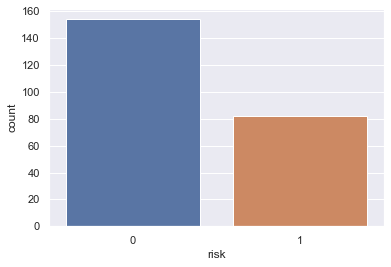

In [9]:
# check the distribution in target variable
# more low risk patients than high risk

sns.set_theme(style="darkgrid")
ax = sns.countplot(x = merged.risk)

In [10]:
merged.risk.value_counts()

0    154
1     82
Name: risk, dtype: int64

## SPLITTING INTO TRAIN AND TEST SETS

In [11]:
gene_drop = merged.drop(["sampleID", "DSS.time"], axis=1)

raw_data = gene_drop.values

X = raw_data[:, 0:-1]
y = raw_data[:, -1]

# 70% training 30% testing

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

### Using only low risk to train the Autoencoder.

In [12]:
y_train = y_train.astype(bool)
y_test = y_test.astype(bool)


#creating normal and fraud datasets
low_train = X_train[~y_train]
low_test = X_test[~y_test]

high_train = X_train[y_train]
high_test = X_test[y_test]

print(" No. of records in Low Train Data=",len(low_train))
print(" No. of records in HIgh Train data=",len(high_train))
print(" No. of records in Low Test Data=",len(low_test))
print(" No. of records in High Test data=",len(high_test))

 No. of records in Low Train Data= 116
 No. of records in HIgh Train data= 49
 No. of records in Low Test Data= 38
 No. of records in High Test data= 33


#### Set the training parameter values

In [13]:
nb_epoch = 50
batch_size = 64
input_dim = low_train.shape[1] #num of columns, 11
encoding_dim = 14
hidden_dim_1 = int(encoding_dim / 2) #
hidden_dim_2=4  
learning_rate = 1e-7

#### Creating the Autoencoder

In [14]:
#input Layer
input_layer = tf.keras.layers.Input(shape=(input_dim, ))

#Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",
                                activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)

# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)

#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 24711)]           0         
_________________________________________________________________
dense (Dense)                (None, 14)                345968    
_________________________________________________________________
dropout (Dropout)            (None, 14)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 32        
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 35        
_________________________________________________________________
dropout_1 (Dropout)          (None, 7)                 0     

#### Define the callbacks for checkpoints and early stopping

In [15]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_risk.h5",
                               mode='min', monitor='val_loss', verbose=2, save_best_only=True)

# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True)

#### Compiling the Autoencoder

In [16]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

#### Training the Autoencoder

In [17]:
history = autoencoder.fit(low_train, low_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history

Epoch 1/50
2/2 [==============================] - 1s 435ms/step - loss: 0.9759 - accuracy: 0.0000e+00 - val_loss: 1.0981 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 1.09809, saving model to autoencoder_risk.h5
Epoch 2/50
2/2 [==============================] - 0s 47ms/step - loss: 0.9756 - accuracy: 0.0000e+00 - val_loss: 1.0979 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss improved from 1.09809 to 1.09792, saving model to autoencoder_risk.h5
Epoch 3/50
2/2 [==============================] - 0s 53ms/step - loss: 0.9750 - accuracy: 0.0086 - val_loss: 1.0975 - val_accuracy: 0.0000e+00

Epoch 00003: val_loss improved from 1.09792 to 1.09749, saving model to autoencoder_risk.h5
Epoch 4/50
2/2 [==============================] - 0s 55ms/step - loss: 0.9740 - accuracy: 0.0000e+00 - val_loss: 1.0969 - val_accuracy: 0.0000e+00

Epoch 00004: val_loss improved from 1.09749 to 1.09689, saving model to autoencoder_risk.h5
Epoch 5/50
2/2 [==============================]

2/2 [==============================] - 0s 49ms/step - loss: 0.9254 - accuracy: 0.0000e+00 - val_loss: 1.0741 - val_accuracy: 0.0000e+00

Epoch 00035: val_loss improved from 1.07500 to 1.07410, saving model to autoencoder_risk.h5
Epoch 36/50
2/2 [==============================] - 0s 48ms/step - loss: 0.9266 - accuracy: 0.0000e+00 - val_loss: 1.0732 - val_accuracy: 0.0000e+00

Epoch 00036: val_loss improved from 1.07410 to 1.07324, saving model to autoencoder_risk.h5
Epoch 37/50
2/2 [==============================] - 0s 49ms/step - loss: 0.9259 - accuracy: 0.0000e+00 - val_loss: 1.0722 - val_accuracy: 0.0000e+00

Epoch 00037: val_loss improved from 1.07324 to 1.07221, saving model to autoencoder_risk.h5
Epoch 38/50
2/2 [==============================] - 0s 54ms/step - loss: 0.9233 - accuracy: 0.0000e+00 - val_loss: 1.0711 - val_accuracy: 0.0000e+00

Epoch 00038: val_loss improved from 1.07221 to 1.07106, saving model to autoencoder_risk.h5
Epoch 39/50
2/2 [==============================]

#### Plot training and test loss

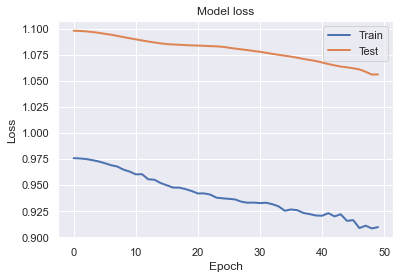

In [18]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#### Detecting Anomalies on test data

In [19]:
y_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - y_pred, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test})

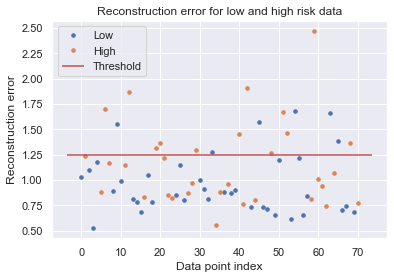

In [20]:
threshold_fixed = 1.25
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "High" if name == 1 else "Low")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for low and high risk data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

#### Evaluating the performance of the anomaly detection

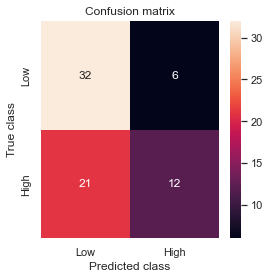

 Accuracy:  0.6197183098591549
 Recall:  0.36363636363636365
 Precision:  0.6666666666666666


In [21]:
threshold_fixed =1.25
LABELS = ['Low', 'High']

pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] =pred_y
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df['True_class'], error_df['pred']))
print(" Recall: ",recall_score(error_df['True_class'], error_df['pred']))
print(" Precision: ",precision_score(error_df['True_class'], error_df['pred']))

## Multi Layer Perceptron

In [26]:
## took DSS.time out of the features 
## because it gives the same relevant information as risk

X = merged.drop(["sampleID", "risk", "DSS.time"], axis=1)
y = merged["risk"]

# 70% training 30% testing

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

### Pipelines

In [27]:
from sklearn.pipeline import Pipeline

## baseline models

mlp_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('mlp', MLPClassifier(max_iter= 500, activation= 'relu'))
    ]
)

In [28]:
## fit models
mlp_pipe.fit(X_train, y_train)
    
print("MLP Accuracy: {:.3f}".format(mlp_pipe.score(X_test,y_test)))

MLP Accuracy: 0.648


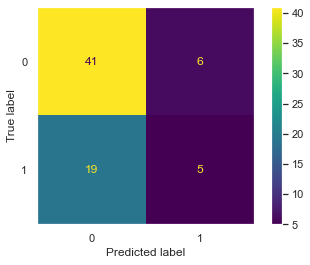

In [29]:
# check confusion matrix of best accuracy
plot_confusion_matrix(mlp_pipe, X_test, y_test, display_labels=["0", "1"])
plt.show
plt.grid(False)

#### Classification report

In [30]:
y_pred = mlp_pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.87      0.77        47
           1       0.45      0.21      0.29        24

    accuracy                           0.65        71
   macro avg       0.57      0.54      0.53        71
weighted avg       0.61      0.65      0.60        71

